In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('messages.csv')

In [7]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [9]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [10]:
df['subject'].fillna(df['subject'].mode()[0], inplace=True)

In [11]:
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [12]:
df['subject'].value_counts()

sociolinguistics                                       70
re :                                                    7
conference announcement                                 6
syntax                                                  6
re : 3 . 396 chomsky citations                          5
                                                       ..
req                                                     1
qs : a question from ask - a-linguist                   1
workshop on embedded mt systems ( call for papers )     1
sum : risk                                              1
sum : english dialect sample sources                    1
Name: subject, Length: 2613, dtype: int64

In [13]:
df['description'] = df[['subject', 'message']].apply(lambda x: ' '.join(x), axis = 1)

In [14]:
df

,subject,message,label,description
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research center conten...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguistics lang classification grimes , ..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,risk a colleague and i are researching the dif...
4,request book information,earlier this morning i was on the phone with a...,0,request book information earlier this morning ...
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,love your profile - ysuolvpv hello thanks for ...
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,you have been asked to join kiddin the list ow...
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,anglicization of composers ' names judging fro...
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,"re : 6 . 797 , comparative method : n - ary co..."


In [15]:
df.drop(['subject','message'],axis=1,inplace=True)

In [16]:
df

,label,description
0,0,job posting - apple-iss research center conten...
1,0,"sociolinguistics lang classification grimes , ..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...
...,...,...
2888,1,love your profile - ysuolvpv hello thanks for ...
2889,1,you have been asked to join kiddin the list ow...
2890,0,anglicization of composers ' names judging fro...
2891,0,"re : 6 . 797 , comparative method : n - ary co..."


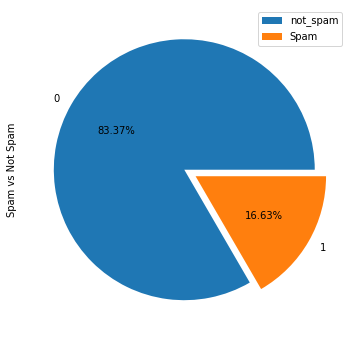

In [17]:
df['label'].value_counts().plot(kind = 'pie', explode=[0, 0.1], figsize = (6, 6), autopct= '%1.2f%%')
plt.ylabel("Spam vs Not Spam")
plt.legend(["not_spam", "Spam"])

In [18]:
df['length'] = df.description.str.len()
df.head(2)

,label,description,length
0,0,job posting - apple-iss research center conten...,2896
1,0,"sociolinguistics lang classification grimes , ...",1817


In [19]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(b.isdigit() for b in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)
df["clean_description"] = df["description"].apply(lambda x: clean_text(x))

In [20]:
df

,label,description,length,clean_description
0,0,job posting - apple-iss research center conten...,2896,job post apple-iss research center content len...
1,0,"sociolinguistics lang classification grimes , ...",1817,sociolinguistics lang classification grime jos...
2,0,query : letter frequencies for text identifica...,1486,query letter frequency text identification pos...
3,0,risk a colleague and i are researching the dif...,329,risk colleague research differ degree risk per...
4,0,request book information earlier this morning ...,1071,request book information earlier morning phone...
...,...,...,...,...
2888,1,love your profile - ysuolvpv hello thanks for ...,291,love profile ysuolvpv hello thanks stop take m...
2889,1,you have been asked to join kiddin the list ow...,2198,ask join kiddin list owner kiddin invite join ...
2890,0,anglicization of composers ' names judging fro...,1074,anglicization composer names judge return post...
2891,0,"re : 6 . 797 , comparative method : n - ary co...",3004,comparative method ary comparison gotcha two s...


In [21]:
df['clean_length'] = df.clean_description.str.len()
df.head(2)

,label,description,length,clean_description,clean_length
0,0,job posting - apple-iss research center conten...,2896,job post apple-iss research center content len...,1924
1,0,"sociolinguistics lang classification grimes , ...",1817,sociolinguistics lang classification grime jos...,1278


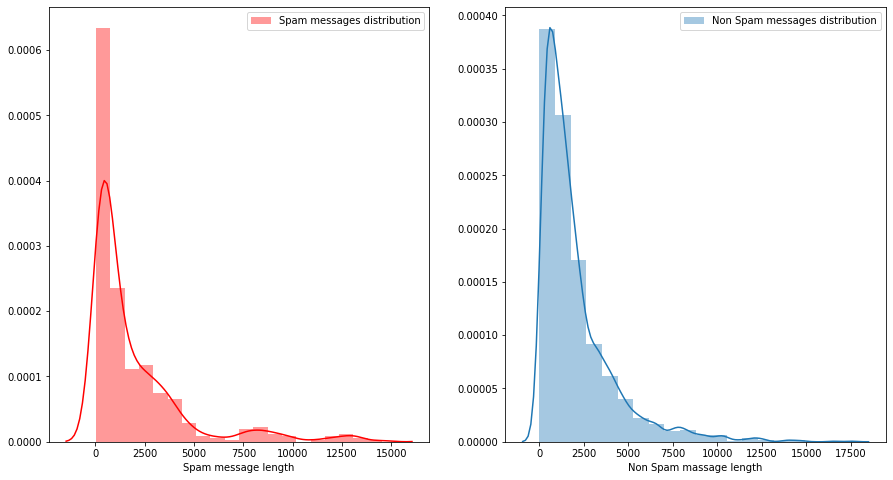

In [22]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='Non Spam messages distribution')
ax[1].set_xlabel('Non Spam massage length')
ax[1].legend()

plt.show()

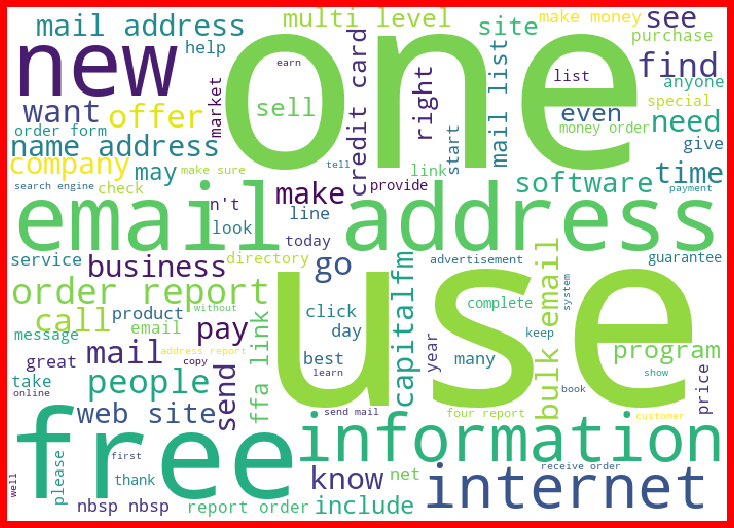

In [23]:
from wordcloud import WordCloud


spams = df['clean_description'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

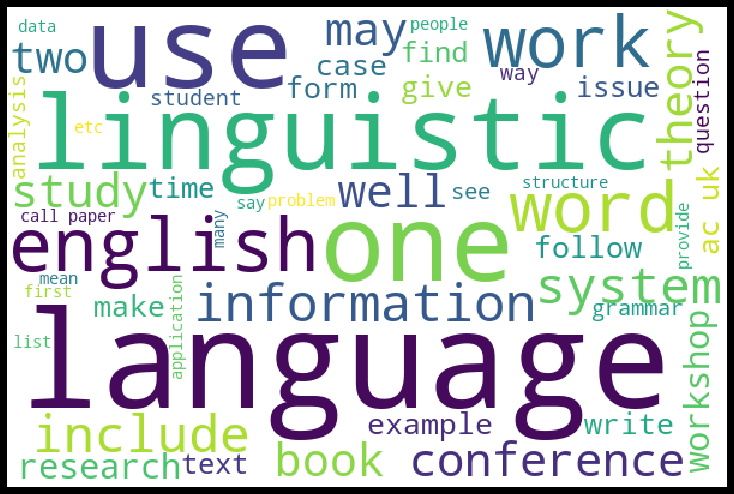

In [24]:
non = df['clean_description'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(non))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [26]:
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['clean_description'])
#features1 = tf_vec.fit_transform(df['description'])

In [27]:
x = features
y = df['label']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [36]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
ETC=ExtraTreesClassifier()

In [37]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.9844559585492227


Cross_Val_Score =  0.9782387834370903


roc_auc_score =  0.9772207646176911


classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       464
           1       0.96      0.97      0.96       115

    accuracy                           0.98       579
   macro avg       0.97      0.98      0.98       579
weighted avg       0.98      0.98      0.98       579



[[459   5]
 [  4 111]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', m

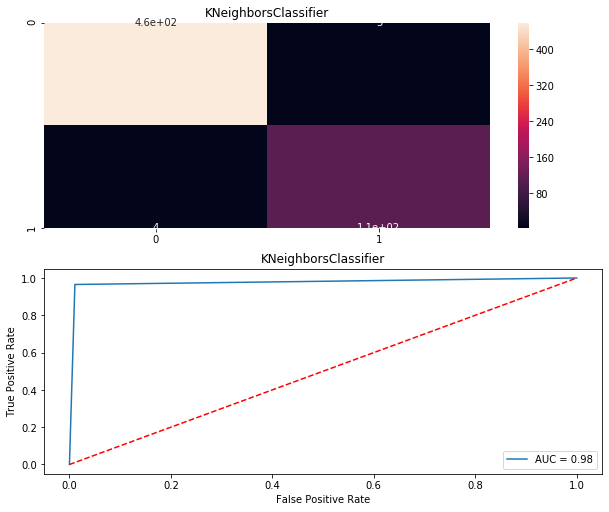

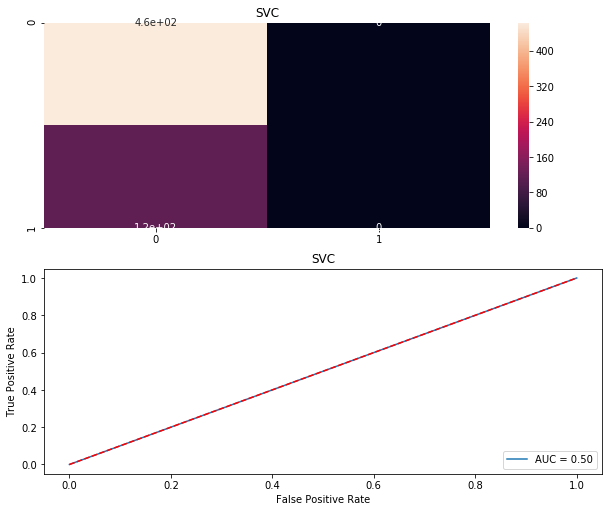

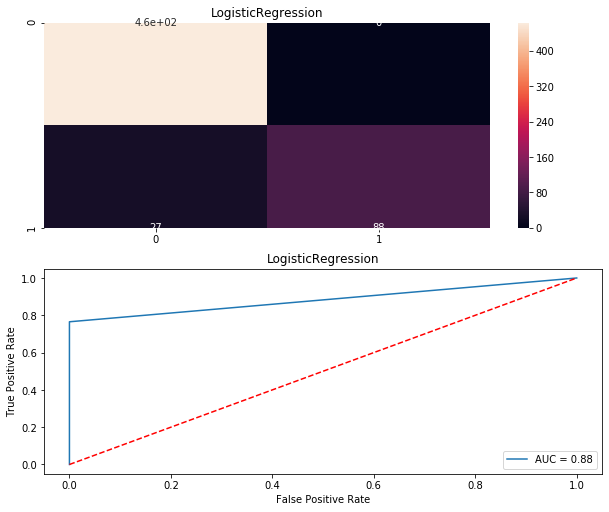

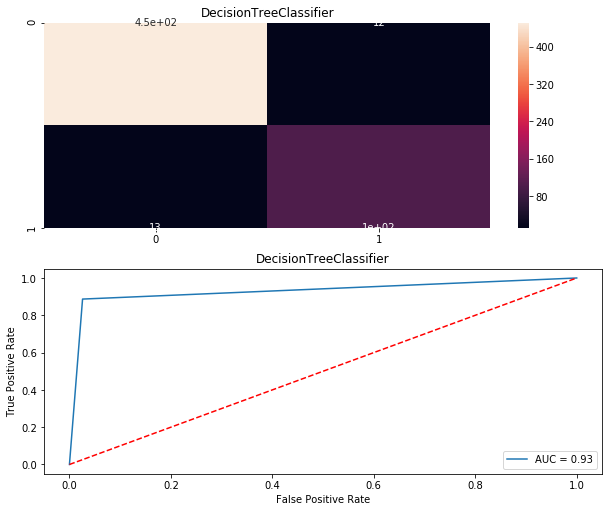

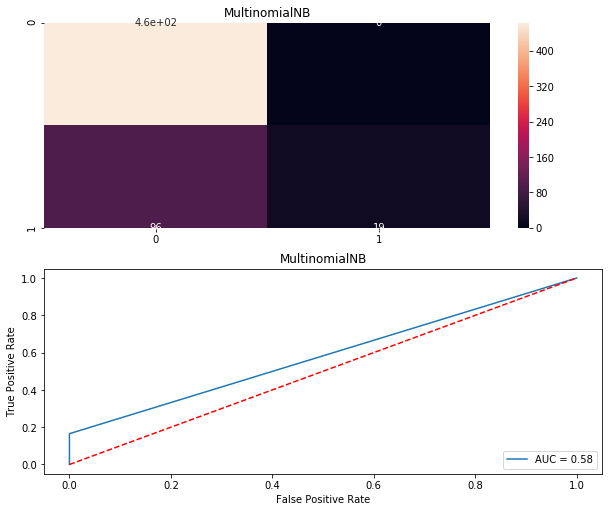

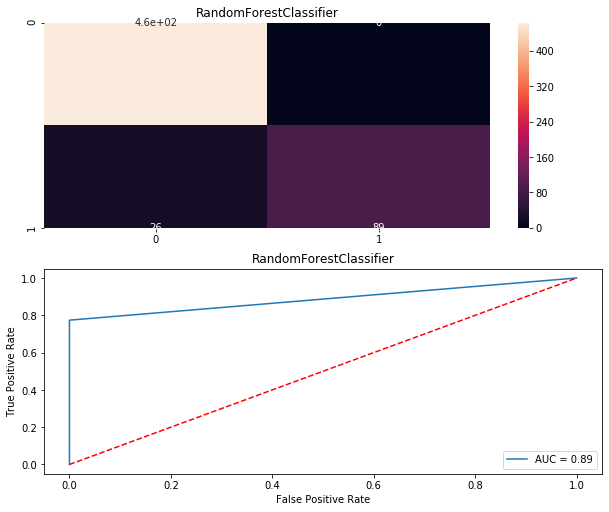

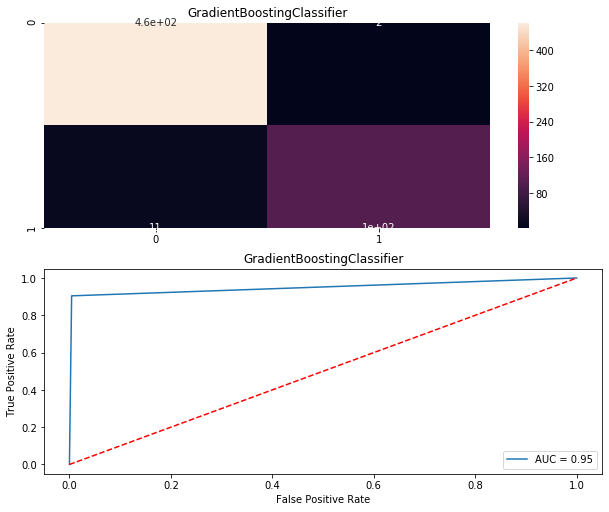

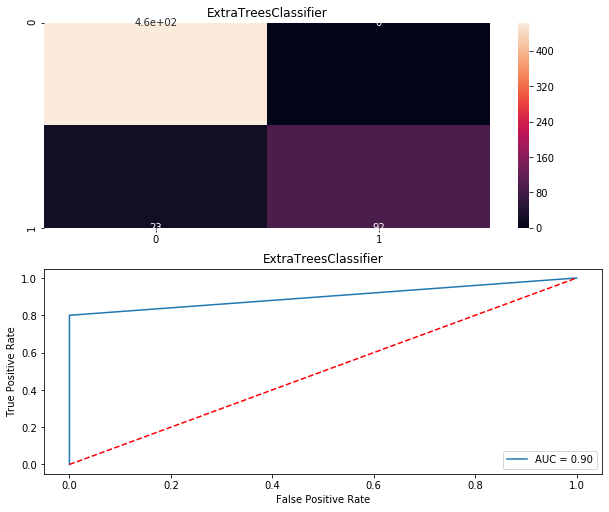

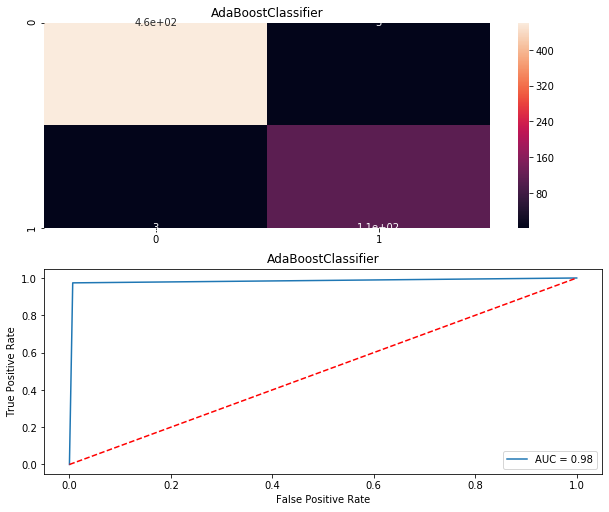

In [38]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [39]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,98.445596,97.823878,97.722076
1,SVC,80.138169,83.373782,50.000000
2,LogisticRegression,95.336788,96.162503,88.260870
3,DecisionTreeClassifier,95.682211,94.746197,93.054723
4,MultinomialNB,83.419689,88.075377,58.260870
5,RandomForestClassifier,95.509499,95.816126,88.695652
6,GradientBoostingClassifier,97.754750,97.028268,95.001874
7,ExtraTreesClassifier,96.027634,95.125751,90.000000
8,AdaBoostClassifier,98.963731,98.410923,98.372376
